# CircoMod baseline runs

#### import libraries

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import numpy as np
import pyam
import itertools
import ipywidgets as widgets
from ipywidgets import interact

## access to scenario explorer

In [2]:
# login with your own username and password: https://pyam-iamc.readthedocs.io/en/v1.6.0/tutorials/iiasa_dbs.html 
#pyam.iiasa.set_config(<username>, <password>)

conn = pyam.iiasa.Connection()

# checking access to databases in scenario explorer
conn.valid_connections 

conn = pyam.iiasa.Connection('circomod_internal')

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.iiasa - INFO: You are connected as user `mzzotin`
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications "HTTP/1.1 200 OK"
httpx - INFO: HTTP Request: POST https://api.manager.ece.iiasa.ac.at/v1/token/obtain/ "HTTP/1.1 200 OK"
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications "HTTP/1.1 200 OK"
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications/IXSE_CIRCOMOD_INTERNAL/config "HTTP/1.1 200 OK"
pyam.iiasa - INFO: You are connected to the IXSE_CIRCOMOD_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/circomod-internal/#/about
pyam.iiasa - INFO: You are connected as user `mzzotin`


## defining variables of interest

In [3]:
# variables last updated 22/01/2025 
variables = ['Emissions|CO2',
'Emissions|Kyoto Gases',
'Energy Service|Commercial|Floor Space',
'Energy Service|Residential and Commercial|Floor Space',
'Energy Service|Residential|Floor Space',
'Energy Service|Transportation|Freight',
'Energy Service|Transportation|Passenger',
'GDP|MER',
'GDP|PPP',
'Material Flows|Losses|Aggregates',
'Material Flows|Losses|Aluminum',
'Material Flows|Losses|Asphalt',
'Material Flows|Losses|Brick',
'Material Flows|Losses|Cement',
'Material Flows|Losses|Chemicals|Plastics',
'Material Flows|Losses|Concrete',
'Material Flows|Losses|Construction Wood',
'Material Flows|Losses|Copper',
'Material Flows|Losses|Glass',
'Material Flows|Losses|Steel',
'Material Flows|Losses|Stone',
'Material Flows|Recycled|Aggregates',
'Material Flows|Recycled|Aluminum',
'Material Flows|Recycled|Asphalt',
'Material Flows|Recycled|Brick',
'Material Flows|Recycled|Cement',
'Material Flows|Recycled|Chemicals|Plastics',
'Material Flows|Recycled|Concrete',
'Material Flows|Recycled|Construction Wood',
'Material Flows|Recycled|Copper',
'Material Flows|Recycled|Glass',
'Material Flows|Recycled|Steel',
'Material Flows|Recycled|Stone',
'Material Flows|Reused|Aggregates',
'Material Flows|Reused|Aluminum',
'Material Flows|Reused|Asphalt',
'Material Flows|Reused|Brick',
'Material Flows|Reused|Cement',
'Material Flows|Reused|Chemicals|Plastics',
'Material Flows|Reused|Concrete',
'Material Flows|Reused|Construction Wood',
'Material Flows|Reused|Copper',
'Material Flows|Reused|Glass',
'Material Flows|Reused|Steel',
'Material Flows|Reused|Stone',
'Material Flows|Virgin Input|Aggregates',
'Material Flows|Virgin Input|Aluminum',
'Material Flows|Virgin Input|Asphalt',
'Material Flows|Virgin Input|Brick',
'Material Flows|Virgin Input|Cement',
'Material Flows|Virgin Input|Chemicals|Plastics',
'Material Flows|Virgin Input|Concrete',
'Material Flows|Virgin Input|Construction Wood',
'Material Flows|Virgin Input|Copper',
'Material Flows|Virgin Input|Glass',
'Material Flows|Virgin Input|Steel',
'Material Flows|Virgin Input|Stone',
'Material Inflow|Aggregates|Buildings',
'Material Inflow|Aggregates|Buildings|Commercial',
'Material Inflow|Aggregates|Buildings|Residential',
'Material Inflow|Aggregates|Electricity',
'Material Inflow|Aggregates|Electricity|Generation',
'Material Inflow|Aggregates|Electricity|Storage',
'Material Inflow|Aggregates|Electricity|Transmission and Distribution',
'Material Inflow|Aggregates|Infrastructure|Mobility',
'Material Inflow|Aggregates|Infrastructure|Mobility|Bridge',
'Material Inflow|Aggregates|Infrastructure|Mobility|Parking',
'Material Inflow|Aggregates|Infrastructure|Mobility|Rail',
'Material Inflow|Aggregates|Infrastructure|Mobility|Road',
'Material Inflow|Aggregates|Infrastructure|Mobility|Tunnel',
'Material Inflow|Aggregates|Transportation',
'Material Inflow|Aggregates|Transportation|Air|Cargo Planes',
'Material Inflow|Aggregates|Transportation|Air|Passenger Planes',
'Material Inflow|Aggregates|Transportation|Rail',
'Material Inflow|Aggregates|Transportation|Rail|Cargo Trains',
'Material Inflow|Aggregates|Transportation|Rail|Passenger Trains',
'Material Inflow|Aggregates|Transportation|Road',
'Material Inflow|Aggregates|Transportation|Road|Bicycles',
'Material Inflow|Aggregates|Transportation|Road|Buses',
'Material Inflow|Aggregates|Transportation|Road|Cars',
'Material Inflow|Aggregates|Transportation|Road|Trucks',
'Material Inflow|Aggregates|Transportation|Water|Ships',
'Material Inflow|Aluminum|Buildings',
'Material Inflow|Aluminum|Buildings|Commercial',
'Material Inflow|Aluminum|Buildings|Residential',
'Material Inflow|Aluminum|Electricity',
'Material Inflow|Aluminum|Electricity|Generation',
'Material Inflow|Aluminum|Electricity|Storage',
'Material Inflow|Aluminum|Electricity|Transmission and Distribution',
'Material Inflow|Aluminum|Infrastructure|Mobility',
'Material Inflow|Aluminum|Infrastructure|Mobility|Bridge',
'Material Inflow|Aluminum|Infrastructure|Mobility|Parking',
'Material Inflow|Aluminum|Infrastructure|Mobility|Rail',
'Material Inflow|Aluminum|Infrastructure|Mobility|Road',
'Material Inflow|Aluminum|Infrastructure|Mobility|Tunnel',
'Material Inflow|Aluminum|Transportation',
'Material Inflow|Aluminum|Transportation|Air',
'Material Inflow|Aluminum|Transportation|Air|Cargo Planes',
'Material Inflow|Aluminum|Transportation|Air|Passenger Planes',
'Material Inflow|Aluminum|Transportation|Rail',
'Material Inflow|Aluminum|Transportation|Rail|Cargo Trains',
'Material Inflow|Aluminum|Transportation|Rail|Passenger Trains',
'Material Inflow|Aluminum|Transportation|Road',
'Material Inflow|Aluminum|Transportation|Road|Bicycles',
'Material Inflow|Aluminum|Transportation|Road|Buses',
'Material Inflow|Aluminum|Transportation|Road|Cars',
'Material Inflow|Aluminum|Transportation|Road|Trucks',
'Material Inflow|Aluminum|Transportation|Vehicles|Rail',
'Material Inflow|Aluminum|Transportation|Vehicles|Road',
'Material Inflow|Aluminum|Transportation|Vehicles|Road|Cars',
'Material Inflow|Aluminum|Transportation|Water|Ships',
'Material Inflow|Asphalt|Buildings',
'Material Inflow|Asphalt|Buildings|Commercial',
'Material Inflow|Asphalt|Buildings|Residential',
'Material Inflow|Asphalt|Electricity',
'Material Inflow|Asphalt|Electricity|Generation',
'Material Inflow|Asphalt|Electricity|Storage',
'Material Inflow|Asphalt|Electricity|Transmission and Distribution',
'Material Inflow|Asphalt|Infrastructure|Mobility',
'Material Inflow|Asphalt|Infrastructure|Mobility|Bridge',
'Material Inflow|Asphalt|Infrastructure|Mobility|Parking',
'Material Inflow|Asphalt|Infrastructure|Mobility|Rail',
'Material Inflow|Asphalt|Infrastructure|Mobility|Road',
'Material Inflow|Asphalt|Infrastructure|Mobility|Tunnel',
'Material Inflow|Asphalt|Transportation',
'Material Inflow|Asphalt|Transportation|Air|Cargo Planes',
'Material Inflow|Asphalt|Transportation|Air|Passenger Planes',
'Material Inflow|Asphalt|Transportation|Rail',
'Material Inflow|Asphalt|Transportation|Rail|Cargo Trains',
'Material Inflow|Asphalt|Transportation|Rail|Passenger Trains',
'Material Inflow|Asphalt|Transportation|Road',
'Material Inflow|Asphalt|Transportation|Road|Bicycles',
'Material Inflow|Asphalt|Transportation|Road|Buses',
'Material Inflow|Asphalt|Transportation|Road|Cars',
'Material Inflow|Asphalt|Transportation|Road|Trucks',
'Material Inflow|Asphalt|Transportation|Water|Ships',
'Material Inflow|Brick|Buildings',
'Material Inflow|Brick|Buildings|Commercial',
'Material Inflow|Brick|Buildings|Residential',
'Material Inflow|Brick|Electricity',
'Material Inflow|Brick|Electricity|Generation',
'Material Inflow|Brick|Electricity|Storage',
'Material Inflow|Brick|Electricity|Transmission and Distribution',
'Material Inflow|Brick|Infrastructure|Mobility',
'Material Inflow|Brick|Infrastructure|Mobility|Bridge',
'Material Inflow|Brick|Infrastructure|Mobility|Parking',
'Material Inflow|Brick|Infrastructure|Mobility|Rail',
'Material Inflow|Brick|Infrastructure|Mobility|Road',
'Material Inflow|Brick|Infrastructure|Mobility|Tunnel',
'Material Inflow|Brick|Transportation',
'Material Inflow|Brick|Transportation|Air|Cargo Planes',
'Material Inflow|Brick|Transportation|Air|Passenger Planes',
'Material Inflow|Brick|Transportation|Rail',
'Material Inflow|Brick|Transportation|Rail|Cargo Trains',
'Material Inflow|Brick|Transportation|Rail|Passenger Trains',
'Material Inflow|Brick|Transportation|Road',
'Material Inflow|Brick|Transportation|Road|Bicycles',
'Material Inflow|Brick|Transportation|Road|Buses',
'Material Inflow|Brick|Transportation|Road|Cars',
'Material Inflow|Brick|Transportation|Road|Trucks',
'Material Inflow|Brick|Transportation|Water|Ships',
'Material Inflow|Cement|Buildings',
'Material Inflow|Cement|Buildings|Commercial',
'Material Inflow|Cement|Buildings|Residential',
'Material Inflow|Cement|Electricity',
'Material Inflow|Cement|Electricity|Generation',
'Material Inflow|Cement|Electricity|Storage',
'Material Inflow|Cement|Electricity|Transmission and Distribution',
'Material Inflow|Cement|Infrastructure|Mobility',
'Material Inflow|Cement|Infrastructure|Mobility|Bridge',
'Material Inflow|Cement|Infrastructure|Mobility|Parking',
'Material Inflow|Cement|Infrastructure|Mobility|Rail',
'Material Inflow|Cement|Infrastructure|Mobility|Road',
'Material Inflow|Cement|Infrastructure|Mobility|Tunnel',
'Material Inflow|Cement|Transportation|Air|Cargo Planes',
'Material Inflow|Cement|Transportation|Air|Passenger Planes',
'Material Inflow|Cement|Transportation|Rail',
'Material Inflow|Cement|Transportation|Rail|Cargo Trains',
'Material Inflow|Cement|Transportation|Rail|Passenger Trains',
'Material Inflow|Cement|Transportation|Road',
'Material Inflow|Cement|Transportation|Road|Bicycles',
'Material Inflow|Cement|Transportation|Road|Buses',
'Material Inflow|Cement|Transportation|Road|Cars',
'Material Inflow|Cement|Transportation|Road|Trucks',
'Material Inflow|Cement|Transportation|Water|Ships',
'Material Inflow|Chemicals|Plastics|Buildings',
'Material Inflow|Chemicals|Plastics|Buildings|Commercial',
'Material Inflow|Chemicals|Plastics|Buildings|Residential',
'Material Inflow|Chemicals|Plastics|Electricity',
'Material Inflow|Chemicals|Plastics|Electricity|Generation',
'Material Inflow|Chemicals|Plastics|Electricity|Storage',
'Material Inflow|Chemicals|Plastics|Electricity|Transmission and Distribution',
'Material Inflow|Chemicals|Plastics|Infrastructure|Mobility',
'Material Inflow|Chemicals|Plastics|Infrastructure|Mobility|Bridge',
'Material Inflow|Chemicals|Plastics|Infrastructure|Mobility|Parking',
'Material Inflow|Chemicals|Plastics|Infrastructure|Mobility|Rail',
'Material Inflow|Chemicals|Plastics|Infrastructure|Mobility|Road',
'Material Inflow|Chemicals|Plastics|Infrastructure|Mobility|Tunnel',
'Material Inflow|Chemicals|Plastics|Transportation',
'Material Inflow|Chemicals|Plastics|Transportation|Air',
'Material Inflow|Chemicals|Plastics|Transportation|Air|Cargo Planes',
'Material Inflow|Chemicals|Plastics|Transportation|Air|Passenger Planes',
'Material Inflow|Chemicals|Plastics|Transportation|Rail',
'Material Inflow|Chemicals|Plastics|Transportation|Rail|Cargo Trains',
'Material Inflow|Chemicals|Plastics|Transportation|Rail|Passenger Trains',
'Material Inflow|Chemicals|Plastics|Transportation|Road',
'Material Inflow|Chemicals|Plastics|Transportation|Road|Bicycles',
'Material Inflow|Chemicals|Plastics|Transportation|Road|Buses',
'Material Inflow|Chemicals|Plastics|Transportation|Road|Cars',
'Material Inflow|Chemicals|Plastics|Transportation|Road|Trucks',
'Material Inflow|Chemicals|Plastics|Transportation|Vehicles|Rail',
'Material Inflow|Chemicals|Plastics|Transportation|Vehicles|Road',
'Material Inflow|Chemicals|Plastics|Transportation|Vehicles|Road|Cars',
'Material Inflow|Chemicals|Plastics|Transportation|Water|Ships',
'Material Inflow|Concrete|Buildings',
'Material Inflow|Concrete|Buildings|Commercial',
'Material Inflow|Concrete|Buildings|Residential',
'Material Inflow|Concrete|Electricity',
'Material Inflow|Concrete|Electricity|Generation',
'Material Inflow|Concrete|Electricity|Storage',
'Material Inflow|Concrete|Electricity|Transmission and Distribution',
'Material Inflow|Concrete|Infrastructure|Mobility',
'Material Inflow|Concrete|Infrastructure|Mobility|Bridge',
'Material Inflow|Concrete|Infrastructure|Mobility|Parking',
'Material Inflow|Concrete|Infrastructure|Mobility|Rail',
'Material Inflow|Concrete|Infrastructure|Mobility|Road',
'Material Inflow|Concrete|Infrastructure|Mobility|Tunnel',
'Material Inflow|Concrete|Transportation',
'Material Inflow|Concrete|Transportation|Air|Cargo Planes',
'Material Inflow|Concrete|Transportation|Air|Passenger Planes',
'Material Inflow|Concrete|Transportation|Rail',
'Material Inflow|Concrete|Transportation|Rail|Cargo Trains',
'Material Inflow|Concrete|Transportation|Rail|Passenger Trains',
'Material Inflow|Concrete|Transportation|Road',
'Material Inflow|Concrete|Transportation|Road|Bicycles',
'Material Inflow|Concrete|Transportation|Road|Buses',
'Material Inflow|Concrete|Transportation|Road|Cars',
'Material Inflow|Concrete|Transportation|Road|Trucks',
'Material Inflow|Concrete|Transportation|Water|Ships',
'Material Inflow|Construction Wood|Buildings',
'Material Inflow|Construction Wood|Buildings|Commercial',
'Material Inflow|Construction Wood|Buildings|Residential',
'Material Inflow|Construction Wood|Electricity',
'Material Inflow|Construction Wood|Electricity|Generation',
'Material Inflow|Construction Wood|Electricity|Storage',
'Material Inflow|Construction Wood|Electricity|Transmission and Distribution',
'Material Inflow|Construction Wood|Infrastructure|Mobility',
'Material Inflow|Construction Wood|Infrastructure|Mobility|Bridge',
'Material Inflow|Construction Wood|Infrastructure|Mobility|Parking',
'Material Inflow|Construction Wood|Infrastructure|Mobility|Rail',
'Material Inflow|Construction Wood|Infrastructure|Mobility|Road',
'Material Inflow|Construction Wood|Infrastructure|Mobility|Tunnel',
'Material Inflow|Construction Wood|Transportation',
'Material Inflow|Construction Wood|Transportation|Air|Cargo Planes',
'Material Inflow|Construction Wood|Transportation|Air|Passenger Planes',
'Material Inflow|Construction Wood|Transportation|Rail',
'Material Inflow|Construction Wood|Transportation|Rail|Cargo Trains',
'Material Inflow|Construction Wood|Transportation|Rail|Passenger Trains',
'Material Inflow|Construction Wood|Transportation|Road',
'Material Inflow|Construction Wood|Transportation|Road|Bicycles',
'Material Inflow|Construction Wood|Transportation|Road|Buses',
'Material Inflow|Construction Wood|Transportation|Road|Cars',
'Material Inflow|Construction Wood|Transportation|Road|Trucks',
'Material Inflow|Construction Wood|Transportation|Water|Ships',
'Material Inflow|Copper|Buildings',
'Material Inflow|Copper|Buildings|Commercial',
'Material Inflow|Copper|Buildings|Residential',
'Material Inflow|Copper|Electricity',
'Material Inflow|Copper|Electricity|Generation',
'Material Inflow|Copper|Electricity|Storage',
'Material Inflow|Copper|Electricity|Transmission and Distribution',
'Material Inflow|Copper|Infrastructure|Mobility',
'Material Inflow|Copper|Infrastructure|Mobility|Bridge',
'Material Inflow|Copper|Infrastructure|Mobility|Parking',
'Material Inflow|Copper|Infrastructure|Mobility|Rail',
'Material Inflow|Copper|Infrastructure|Mobility|Road',
'Material Inflow|Copper|Infrastructure|Mobility|Tunnel',
'Material Inflow|Copper|Transportation',
'Material Inflow|Copper|Transportation|Air',
'Material Inflow|Copper|Transportation|Air|Cargo Planes',
'Material Inflow|Copper|Transportation|Air|Passenger Planes',
'Material Inflow|Copper|Transportation|Rail',
'Material Inflow|Copper|Transportation|Rail|Cargo Trains',
'Material Inflow|Copper|Transportation|Rail|Passenger Trains',
'Material Inflow|Copper|Transportation|Road',
'Material Inflow|Copper|Transportation|Road|Bicycles',
'Material Inflow|Copper|Transportation|Road|Buses',
'Material Inflow|Copper|Transportation|Road|Cars',
'Material Inflow|Copper|Transportation|Road|Trucks',
'Material Inflow|Copper|Transportation|Vehicles|Rail',
'Material Inflow|Copper|Transportation|Vehicles|Road',
'Material Inflow|Copper|Transportation|Vehicles|Road|Cars',
'Material Inflow|Copper|Transportation|Water|Ships',
'Material Inflow|Glass|Buildings',
'Material Inflow|Glass|Buildings|Commercial',
'Material Inflow|Glass|Buildings|Residential',
'Material Inflow|Glass|Electricity',
'Material Inflow|Glass|Electricity|Generation',
'Material Inflow|Glass|Electricity|Storage',
'Material Inflow|Glass|Electricity|Transmission and Distribution',
'Material Inflow|Glass|Infrastructure|Mobility',
'Material Inflow|Glass|Infrastructure|Mobility|Bridge',
'Material Inflow|Glass|Infrastructure|Mobility|Parking',
'Material Inflow|Glass|Infrastructure|Mobility|Rail',
'Material Inflow|Glass|Infrastructure|Mobility|Road',
'Material Inflow|Glass|Infrastructure|Mobility|Tunnel',
'Material Inflow|Glass|Transportation',
'Material Inflow|Glass|Transportation|Air',
'Material Inflow|Glass|Transportation|Air|Cargo Planes',
'Material Inflow|Glass|Transportation|Air|Passenger Planes',
'Material Inflow|Glass|Transportation|Rail',
'Material Inflow|Glass|Transportation|Rail|Cargo Trains',
'Material Inflow|Glass|Transportation|Rail|Passenger Trains',
'Material Inflow|Glass|Transportation|Road',
'Material Inflow|Glass|Transportation|Road|Bicycles',
'Material Inflow|Glass|Transportation|Road|Buses',
'Material Inflow|Glass|Transportation|Road|Cars',
'Material Inflow|Glass|Transportation|Road|Trucks',
'Material Inflow|Glass|Transportation|Vehicles|Rail',
'Material Inflow|Glass|Transportation|Vehicles|Road',
'Material Inflow|Glass|Transportation|Vehicles|Road|Cars',
'Material Inflow|Glass|Transportation|Water|Ships',
'Material Inflow|Steel|Buildings',
'Material Inflow|Steel|Buildings|Commercial',
'Material Inflow|Steel|Buildings|Residential',
'Material Inflow|Steel|Electricity',
'Material Inflow|Steel|Electricity|Generation',
'Material Inflow|Steel|Electricity|Storage',
'Material Inflow|Steel|Electricity|Transmission and Distribution',
'Material Inflow|Steel|Infrastructure|Mobility',
'Material Inflow|Steel|Infrastructure|Mobility|Bridge',
'Material Inflow|Steel|Infrastructure|Mobility|Parking',
'Material Inflow|Steel|Infrastructure|Mobility|Rail',
'Material Inflow|Steel|Infrastructure|Mobility|Road',
'Material Inflow|Steel|Infrastructure|Mobility|Tunnel',
'Material Inflow|Steel|Transportation',
'Material Inflow|Steel|Transportation|Air',
'Material Inflow|Steel|Transportation|Air|Cargo Planes',
'Material Inflow|Steel|Transportation|Air|Passenger Planes',
'Material Inflow|Steel|Transportation|Rail',
'Material Inflow|Steel|Transportation|Rail|Cargo Trains',
'Material Inflow|Steel|Transportation|Rail|Passenger Trains',
'Material Inflow|Steel|Transportation|Road',
'Material Inflow|Steel|Transportation|Road|Bicycles',
'Material Inflow|Steel|Transportation|Road|Buses',
'Material Inflow|Steel|Transportation|Road|Cars',
'Material Inflow|Steel|Transportation|Road|Trucks',
'Material Inflow|Steel|Transportation|Vehicles|Rail',
'Material Inflow|Steel|Transportation|Vehicles|Road',
'Material Inflow|Steel|Transportation|Vehicles|Road|Cars',
'Material Inflow|Steel|Transportation|Water|Ships',
'Material Inflow|Stone|Buildings',
'Material Inflow|Stone|Buildings|Commercial',
'Material Inflow|Stone|Buildings|Residential',
'Material Inflow|Stone|Electricity',
'Material Inflow|Stone|Electricity|Generation',
'Material Inflow|Stone|Electricity|Storage',
'Material Inflow|Stone|Electricity|Transmission and Distribution',
'Material Inflow|Stone|Infrastructure|Mobility',
'Material Inflow|Stone|Infrastructure|Mobility|Bridge',
'Material Inflow|Stone|Infrastructure|Mobility|Parking',
'Material Inflow|Stone|Infrastructure|Mobility|Rail',
'Material Inflow|Stone|Infrastructure|Mobility|Road',
'Material Inflow|Stone|Infrastructure|Mobility|Tunnel',
'Material Inflow|Stone|Transportation',
'Material Inflow|Stone|Transportation|Air|Cargo Planes',
'Material Inflow|Stone|Transportation|Air|Passenger Planes',
'Material Inflow|Stone|Transportation|Rail',
'Material Inflow|Stone|Transportation|Rail|Cargo Trains',
'Material Inflow|Stone|Transportation|Rail|Passenger Trains',
'Material Inflow|Stone|Transportation|Road',
'Material Inflow|Stone|Transportation|Road|Bicycles',
'Material Inflow|Stone|Transportation|Road|Buses',
'Material Inflow|Stone|Transportation|Road|Cars',
'Material Inflow|Stone|Transportation|Road|Trucks',
'Material Inflow|Stone|Transportation|Water|Ships',
'Material Inflowl|Aluminum|Buildings|Commercial',
'Material Inflowl|Aluminum|Buildings|Residential',
'Material Outflow|Aggregates|Buildings',
'Material Outflow|Aggregates|Buildings|Commercial',
'Material Outflow|Aggregates|Buildings|Residential',
'Material Outflow|Aggregates|Electricity',
'Material Outflow|Aggregates|Electricity|Generation',
'Material Outflow|Aggregates|Electricity|Storage',
'Material Outflow|Aggregates|Electricity|Transmission and Distribution',
'Material Outflow|Aggregates|Infrastructure|Mobility',
'Material Outflow|Aggregates|Infrastructure|Mobility|Bridge',
'Material Outflow|Aggregates|Infrastructure|Mobility|Parking',
'Material Outflow|Aggregates|Infrastructure|Mobility|Rail',
'Material Outflow|Aggregates|Infrastructure|Mobility|Road',
'Material Outflow|Aggregates|Infrastructure|Mobility|Tunnel',
'Material Outflow|Aggregates|Transportation',
'Material Outflow|Aggregates|Transportation|Air|Cargo Planes',
'Material Outflow|Aggregates|Transportation|Air|Passenger Planes',
'Material Outflow|Aggregates|Transportation|Rail',
'Material Outflow|Aggregates|Transportation|Rail|Cargo Trains',
'Material Outflow|Aggregates|Transportation|Rail|Passenger Trains',
'Material Outflow|Aggregates|Transportation|Road',
'Material Outflow|Aggregates|Transportation|Road|Bicycles',
'Material Outflow|Aggregates|Transportation|Road|Buses',
'Material Outflow|Aggregates|Transportation|Road|Cars',
'Material Outflow|Aggregates|Transportation|Road|Trucks',
'Material Outflow|Aggregates|Transportation|Water|Ships',
'Material Outflow|Aluminum|Buildings',
'Material Outflow|Aluminum|Buildings|Commercial',
'Material Outflow|Aluminum|Buildings|Residential',
'Material Outflow|Aluminum|Electricity',
'Material Outflow|Aluminum|Electricity|Generation',
'Material Outflow|Aluminum|Electricity|Storage',
'Material Outflow|Aluminum|Electricity|Transmission and Distribution',
'Material Outflow|Aluminum|Infrastructure|Mobility',
'Material Outflow|Aluminum|Infrastructure|Mobility|Bridge',
'Material Outflow|Aluminum|Infrastructure|Mobility|Parking',
'Material Outflow|Aluminum|Infrastructure|Mobility|Rail',
'Material Outflow|Aluminum|Infrastructure|Mobility|Road',
'Material Outflow|Aluminum|Infrastructure|Mobility|Tunnel',
'Material Outflow|Aluminum|Transportation',
'Material Outflow|Aluminum|Transportation|Air|Cargo Planes',
'Material Outflow|Aluminum|Transportation|Air|Passenger Planes',
'Material Outflow|Aluminum|Transportation|Rail',
'Material Outflow|Aluminum|Transportation|Rail|Cargo Trains',
'Material Outflow|Aluminum|Transportation|Rail|Passenger Trains',
'Material Outflow|Aluminum|Transportation|Road',
'Material Outflow|Aluminum|Transportation|Road|Bicycles',
'Material Outflow|Aluminum|Transportation|Road|Buses',
'Material Outflow|Aluminum|Transportation|Road|Cars',
'Material Outflow|Aluminum|Transportation|Road|Trucks',
'Material Outflow|Aluminum|Transportation|Water|Ships',
'Material Outflow|Asphalt|Buildings',
'Material Outflow|Asphalt|Buildings|Commercial',
'Material Outflow|Asphalt|Buildings|Residential',
'Material Outflow|Asphalt|Electricity',
'Material Outflow|Asphalt|Electricity|Generation',
'Material Outflow|Asphalt|Electricity|Storage',
'Material Outflow|Asphalt|Electricity|Transmission and Distribution',
'Material Outflow|Asphalt|Infrastructure|Mobility',
'Material Outflow|Asphalt|Infrastructure|Mobility|Bridge',
'Material Outflow|Asphalt|Infrastructure|Mobility|Parking',
'Material Outflow|Asphalt|Infrastructure|Mobility|Rail',
'Material Outflow|Asphalt|Infrastructure|Mobility|Road',
'Material Outflow|Asphalt|Infrastructure|Mobility|Tunnel',
'Material Outflow|Asphalt|Transportation',
'Material Outflow|Asphalt|Transportation|Air|Cargo Planes',
'Material Outflow|Asphalt|Transportation|Air|Passenger Planes',
'Material Outflow|Asphalt|Transportation|Rail',
'Material Outflow|Asphalt|Transportation|Rail|Cargo Trains',
'Material Outflow|Asphalt|Transportation|Rail|Passenger Trains',
'Material Outflow|Asphalt|Transportation|Road',
'Material Outflow|Asphalt|Transportation|Road|Bicycles',
'Material Outflow|Asphalt|Transportation|Road|Buses',
'Material Outflow|Asphalt|Transportation|Road|Cars',
'Material Outflow|Asphalt|Transportation|Road|Trucks',
'Material Outflow|Asphalt|Transportation|Water|Ships',
'Material Outflow|Brick|Buildings',
'Material Outflow|Brick|Buildings|Commercial',
'Material Outflow|Brick|Buildings|Residential',
'Material Outflow|Brick|Electricity',
'Material Outflow|Brick|Electricity|Generation',
'Material Outflow|Brick|Electricity|Storage',
'Material Outflow|Brick|Electricity|Transmission and Distribution',
'Material Outflow|Brick|Infrastructure|Mobility',
'Material Outflow|Brick|Infrastructure|Mobility|Bridge',
'Material Outflow|Brick|Infrastructure|Mobility|Parking',
'Material Outflow|Brick|Infrastructure|Mobility|Rail',
'Material Outflow|Brick|Infrastructure|Mobility|Road',
'Material Outflow|Brick|Infrastructure|Mobility|Tunnel',
'Material Outflow|Brick|Transportation',
'Material Outflow|Brick|Transportation|Air|Cargo Planes',
'Material Outflow|Brick|Transportation|Air|Passenger Planes',
'Material Outflow|Brick|Transportation|Rail',
'Material Outflow|Brick|Transportation|Rail|Cargo Trains',
'Material Outflow|Brick|Transportation|Rail|Passenger Trains',
'Material Outflow|Brick|Transportation|Road',
'Material Outflow|Brick|Transportation|Road|Bicycles',
'Material Outflow|Brick|Transportation|Road|Buses',
'Material Outflow|Brick|Transportation|Road|Cars',
'Material Outflow|Brick|Transportation|Road|Trucks',
'Material Outflow|Brick|Transportation|Water|Ships',
'Material Outflow|Cement|Buildings',
'Material Outflow|Cement|Buildings|Commercial',
'Material Outflow|Cement|Buildings|Residential',
'Material Outflow|Cement|Electricity',
'Material Outflow|Cement|Electricity|Generation',
'Material Outflow|Cement|Electricity|Storage',
'Material Outflow|Cement|Electricity|Transmission and Distribution',
'Material Outflow|Cement|Infrastructure|Mobility',
'Material Outflow|Cement|Infrastructure|Mobility|Bridge',
'Material Outflow|Cement|Infrastructure|Mobility|Parking',
'Material Outflow|Cement|Infrastructure|Mobility|Rail',
'Material Outflow|Cement|Infrastructure|Mobility|Road',
'Material Outflow|Cement|Infrastructure|Mobility|Tunnel',
'Material Outflow|Cement|Transportation|Air|Cargo Planes',
'Material Outflow|Cement|Transportation|Air|Passenger Planes',
'Material Outflow|Cement|Transportation|Rail',
'Material Outflow|Cement|Transportation|Rail|Cargo Trains',
'Material Outflow|Cement|Transportation|Rail|Passenger Trains',
'Material Outflow|Cement|Transportation|Road',
'Material Outflow|Cement|Transportation|Road|Bicycles',
'Material Outflow|Cement|Transportation|Road|Buses',
'Material Outflow|Cement|Transportation|Road|Cars',
'Material Outflow|Cement|Transportation|Road|Trucks',
'Material Outflow|Cement|Transportation|Water|Ships',
'Material Outflow|Chemicals|Plastics|Buildings',
'Material Outflow|Chemicals|Plastics|Buildings|Commercial',
'Material Outflow|Chemicals|Plastics|Buildings|Residential',
'Material Outflow|Chemicals|Plastics|Electricity',
'Material Outflow|Chemicals|Plastics|Electricity|Generation',
'Material Outflow|Chemicals|Plastics|Electricity|Storage',
'Material Outflow|Chemicals|Plastics|Electricity|Transmission and Distribution',
'Material Outflow|Chemicals|Plastics|Infrastructure|Mobility',
'Material Outflow|Chemicals|Plastics|Infrastructure|Mobility|Bridge',
'Material Outflow|Chemicals|Plastics|Infrastructure|Mobility|Parking',
'Material Outflow|Chemicals|Plastics|Infrastructure|Mobility|Rail',
'Material Outflow|Chemicals|Plastics|Infrastructure|Mobility|Road',
'Material Outflow|Chemicals|Plastics|Infrastructure|Mobility|Tunnel',
'Material Outflow|Chemicals|Plastics|Transportation',
'Material Outflow|Chemicals|Plastics|Transportation|Air|Cargo Planes',
'Material Outflow|Chemicals|Plastics|Transportation|Air|Passenger Planes',
'Material Outflow|Chemicals|Plastics|Transportation|Rail',
'Material Outflow|Chemicals|Plastics|Transportation|Rail|Cargo Trains',
'Material Outflow|Chemicals|Plastics|Transportation|Rail|Passenger Trains',
'Material Outflow|Chemicals|Plastics|Transportation|Road',
'Material Outflow|Chemicals|Plastics|Transportation|Road|Bicycles',
'Material Outflow|Chemicals|Plastics|Transportation|Road|Buses',
'Material Outflow|Chemicals|Plastics|Transportation|Road|Cars',
'Material Outflow|Chemicals|Plastics|Transportation|Road|Trucks',
'Material Outflow|Chemicals|Plastics|Transportation|Water|Ships',
'Material Outflow|Concrete|Buildings',
'Material Outflow|Concrete|Buildings|Commercial',
'Material Outflow|Concrete|Buildings|Residential',
'Material Outflow|Concrete|Electricity',
'Material Outflow|Concrete|Electricity|Generation',
'Material Outflow|Concrete|Electricity|Storage',
'Material Outflow|Concrete|Electricity|Transmission and Distribution',
'Material Outflow|Concrete|Infrastructure|Mobility',
'Material Outflow|Concrete|Infrastructure|Mobility|Bridge',
'Material Outflow|Concrete|Infrastructure|Mobility|Parking',
'Material Outflow|Concrete|Infrastructure|Mobility|Rail',
'Material Outflow|Concrete|Infrastructure|Mobility|Road',
'Material Outflow|Concrete|Infrastructure|Mobility|Tunnel',
'Material Outflow|Concrete|Transportation',
'Material Outflow|Concrete|Transportation|Air|Cargo Planes',
'Material Outflow|Concrete|Transportation|Air|Passenger Planes',
'Material Outflow|Concrete|Transportation|Rail',
'Material Outflow|Concrete|Transportation|Rail|Cargo Trains',
'Material Outflow|Concrete|Transportation|Rail|Passenger Trains',
'Material Outflow|Concrete|Transportation|Road',
'Material Outflow|Concrete|Transportation|Road|Bicycles',
'Material Outflow|Concrete|Transportation|Road|Buses',
'Material Outflow|Concrete|Transportation|Road|Cars',
'Material Outflow|Concrete|Transportation|Road|Trucks',
'Material Outflow|Concrete|Transportation|Water|Ships',
'Material Outflow|Construction Wood|Buildings',
'Material Outflow|Construction Wood|Buildings|Commercial',
'Material Outflow|Construction Wood|Buildings|Residential',
'Material Outflow|Construction Wood|Electricity',
'Material Outflow|Construction Wood|Electricity|Generation',
'Material Outflow|Construction Wood|Electricity|Storage',
'Material Outflow|Construction Wood|Electricity|Transmission and Distribution',
'Material Outflow|Construction Wood|Infrastructure|Mobility',
'Material Outflow|Construction Wood|Infrastructure|Mobility|Bridge',
'Material Outflow|Construction Wood|Infrastructure|Mobility|Parking',
'Material Outflow|Construction Wood|Infrastructure|Mobility|Rail',
'Material Outflow|Construction Wood|Infrastructure|Mobility|Road',
'Material Outflow|Construction Wood|Infrastructure|Mobility|Tunnel',
'Material Outflow|Construction Wood|Transportation',
'Material Outflow|Construction Wood|Transportation|Air|Cargo Planes',
'Material Outflow|Construction Wood|Transportation|Air|Passenger Planes',
'Material Outflow|Construction Wood|Transportation|Rail',
'Material Outflow|Construction Wood|Transportation|Rail|Cargo Trains',
'Material Outflow|Construction Wood|Transportation|Rail|Passenger Trains',
'Material Outflow|Construction Wood|Transportation|Road',
'Material Outflow|Construction Wood|Transportation|Road|Bicycles',
'Material Outflow|Construction Wood|Transportation|Road|Buses',
'Material Outflow|Construction Wood|Transportation|Road|Cars',
'Material Outflow|Construction Wood|Transportation|Road|Trucks',
'Material Outflow|Construction Wood|Transportation|Water|Ships',
'Material Outflow|Copper|Buildings',
'Material Outflow|Copper|Buildings|Commercial',
'Material Outflow|Copper|Buildings|Residential',
'Material Outflow|Copper|Electricity',
'Material Outflow|Copper|Electricity|Generation',
'Material Outflow|Copper|Electricity|Storage',
'Material Outflow|Copper|Electricity|Transmission and Distribution',
'Material Outflow|Copper|Infrastructure|Mobility',
'Material Outflow|Copper|Infrastructure|Mobility|Bridge',
'Material Outflow|Copper|Infrastructure|Mobility|Parking',
'Material Outflow|Copper|Infrastructure|Mobility|Rail',
'Material Outflow|Copper|Infrastructure|Mobility|Road',
'Material Outflow|Copper|Infrastructure|Mobility|Tunnel',
'Material Outflow|Copper|Transportation',
'Material Outflow|Copper|Transportation|Air|Cargo Planes',
'Material Outflow|Copper|Transportation|Air|Passenger Planes',
'Material Outflow|Copper|Transportation|Rail',
'Material Outflow|Copper|Transportation|Rail|Cargo Trains',
'Material Outflow|Copper|Transportation|Rail|Passenger Trains',
'Material Outflow|Copper|Transportation|Road',
'Material Outflow|Copper|Transportation|Road|Bicycles',
'Material Outflow|Copper|Transportation|Road|Buses',
'Material Outflow|Copper|Transportation|Road|Cars',
'Material Outflow|Copper|Transportation|Road|Trucks',
'Material Outflow|Copper|Transportation|Water|Ships',
'Material Outflow|Glass|Buildings',
'Material Outflow|Glass|Buildings|Commercial',
'Material Outflow|Glass|Buildings|Residential',
'Material Outflow|Glass|Electricity',
'Material Outflow|Glass|Electricity|Generation',
'Material Outflow|Glass|Electricity|Storage',
'Material Outflow|Glass|Electricity|Transmission and Distribution',
'Material Outflow|Glass|Infrastructure|Mobility',
'Material Outflow|Glass|Infrastructure|Mobility|Bridge',
'Material Outflow|Glass|Infrastructure|Mobility|Parking',
'Material Outflow|Glass|Infrastructure|Mobility|Rail',
'Material Outflow|Glass|Infrastructure|Mobility|Road',
'Material Outflow|Glass|Infrastructure|Mobility|Tunnel',
'Material Outflow|Glass|Transportation',
'Material Outflow|Glass|Transportation|Air|Cargo Planes',
'Material Outflow|Glass|Transportation|Air|Passenger Planes',
'Material Outflow|Glass|Transportation|Rail',
'Material Outflow|Glass|Transportation|Rail|Cargo Trains',
'Material Outflow|Glass|Transportation|Rail|Passenger Trains',
'Material Outflow|Glass|Transportation|Road',
'Material Outflow|Glass|Transportation|Road|Bicycles',
'Material Outflow|Glass|Transportation|Road|Buses',
'Material Outflow|Glass|Transportation|Road|Cars',
'Material Outflow|Glass|Transportation|Road|Trucks',
'Material Outflow|Glass|Transportation|Water|Ships',
'Material Outflow|Steel|Buildings',
'Material Outflow|Steel|Buildings|Commercial',
'Material Outflow|Steel|Buildings|Residential',
'Material Outflow|Steel|Electricity',
'Material Outflow|Steel|Electricity|Generation',
'Material Outflow|Steel|Electricity|Storage',
'Material Outflow|Steel|Electricity|Transmission and Distribution',
'Material Outflow|Steel|Infrastructure|Mobility',
'Material Outflow|Steel|Infrastructure|Mobility|Bridge',
'Material Outflow|Steel|Infrastructure|Mobility|Parking',
'Material Outflow|Steel|Infrastructure|Mobility|Rail',
'Material Outflow|Steel|Infrastructure|Mobility|Road',
'Material Outflow|Steel|Infrastructure|Mobility|Tunnel',
'Material Outflow|Steel|Transportation',
'Material Outflow|Steel|Transportation|Air|Cargo Planes',
'Material Outflow|Steel|Transportation|Air|Passenger Planes',
'Material Outflow|Steel|Transportation|Rail',
'Material Outflow|Steel|Transportation|Rail|Cargo Trains',
'Material Outflow|Steel|Transportation|Rail|Passenger Trains',
'Material Outflow|Steel|Transportation|Road',
'Material Outflow|Steel|Transportation|Road|Bicycles',
'Material Outflow|Steel|Transportation|Road|Buses',
'Material Outflow|Steel|Transportation|Road|Cars',
'Material Outflow|Steel|Transportation|Road|Trucks',
'Material Outflow|Steel|Transportation|Water|Ships',
'Material Outflow|Stone|Buildings',
'Material Outflow|Stone|Buildings|Commercial',
'Material Outflow|Stone|Buildings|Residential',
'Material Outflow|Stone|Electricity',
'Material Outflow|Stone|Electricity|Generation',
'Material Outflow|Stone|Electricity|Storage',
'Material Outflow|Stone|Electricity|Transmission and Distribution',
'Material Outflow|Stone|Infrastructure|Mobility',
'Material Outflow|Stone|Infrastructure|Mobility|Bridge',
'Material Outflow|Stone|Infrastructure|Mobility|Parking',
'Material Outflow|Stone|Infrastructure|Mobility|Rail',
'Material Outflow|Stone|Infrastructure|Mobility|Road',
'Material Outflow|Stone|Infrastructure|Mobility|Tunnel',
'Material Outflow|Stone|Transportation',
'Material Outflow|Stone|Transportation|Air|Cargo Planes',
'Material Outflow|Stone|Transportation|Air|Passenger Planes',
'Material Outflow|Stone|Transportation|Rail',
'Material Outflow|Stone|Transportation|Rail|Cargo Trains',
'Material Outflow|Stone|Transportation|Rail|Passenger Trains',
'Material Outflow|Stone|Transportation|Road',
'Material Outflow|Stone|Transportation|Road|Bicycles',
'Material Outflow|Stone|Transportation|Road|Buses',
'Material Outflow|Stone|Transportation|Road|Cars',
'Material Outflow|Stone|Transportation|Road|Trucks',
'Material Outflow|Stone|Transportation|Water|Ships',
'Material Recycling|Aluminum',
'Material Recycling|Aluminum [Share]',
'Material Recycling|Chemicals',
'Material Recycling|Chemicals [Share]',
'Material Recycling|Plastics',
'Material Recycling|Plastics [Share]',
'Material Recycling|Steel',
'Material Recycling|Steel [Share]',
'Material Stock|Aggregates|Buildings',
'Material Stock|Aggregates|Buildings|Commercial',
'Material Stock|Aggregates|Buildings|Residential',
'Material Stock|Aggregates|Electricity',
'Material Stock|Aggregates|Electricity|Generation',
'Material Stock|Aggregates|Electricity|Storage',
'Material Stock|Aggregates|Electricity|Transmission and Distribution',
'Material Stock|Aggregates|Infrastructure|Mobility',
'Material Stock|Aggregates|Infrastructure|Mobility|Bridge',
'Material Stock|Aggregates|Infrastructure|Mobility|Parking',
'Material Stock|Aggregates|Infrastructure|Mobility|Rail',
'Material Stock|Aggregates|Infrastructure|Mobility|Road',
'Material Stock|Aggregates|Infrastructure|Mobility|Tunnel',
'Material Stock|Aggregates|Transportation',
'Material Stock|Aggregates|Transportation|Air|Cargo Planes',
'Material Stock|Aggregates|Transportation|Air|Passenger Planes',
'Material Stock|Aggregates|Transportation|Rail',
'Material Stock|Aggregates|Transportation|Rail|Cargo Trains',
'Material Stock|Aggregates|Transportation|Rail|Passenger Trains',
'Material Stock|Aggregates|Transportation|Road',
'Material Stock|Aggregates|Transportation|Road|Bicycles',
'Material Stock|Aggregates|Transportation|Road|Buses',
'Material Stock|Aggregates|Transportation|Road|Cars',
'Material Stock|Aggregates|Transportation|Road|Trucks',
'Material Stock|Aggregates|Transportation|Water|Ships',
'Material Stock|Aluminum|Buildings',
'Material Stock|Aluminum|Buildings|Commercial',
'Material Stock|Aluminum|Buildings|Residential',
'Material Stock|Aluminum|Electricity',
'Material Stock|Aluminum|Electricity|Generation',
'Material Stock|Aluminum|Electricity|Storage',
'Material Stock|Aluminum|Electricity|Transmission and Distribution',
'Material Stock|Aluminum|Infrastructure|Mobility',
'Material Stock|Aluminum|Infrastructure|Mobility|Bridge',
'Material Stock|Aluminum|Infrastructure|Mobility|Parking',
'Material Stock|Aluminum|Infrastructure|Mobility|Rail',
'Material Stock|Aluminum|Infrastructure|Mobility|Road',
'Material Stock|Aluminum|Infrastructure|Mobility|Tunnel',
'Material Stock|Aluminum|Transportation',
'Material Stock|Aluminum|Transportation|Air',
'Material Stock|Aluminum|Transportation|Air|Cargo Planes',
'Material Stock|Aluminum|Transportation|Air|Passenger Planes',
'Material Stock|Aluminum|Transportation|Rail',
'Material Stock|Aluminum|Transportation|Rail|Cargo Trains',
'Material Stock|Aluminum|Transportation|Rail|Passenger Trains',
'Material Stock|Aluminum|Transportation|Road',
'Material Stock|Aluminum|Transportation|Road|Bicycles',
'Material Stock|Aluminum|Transportation|Road|Buses',
'Material Stock|Aluminum|Transportation|Road|Cars',
'Material Stock|Aluminum|Transportation|Road|Trucks',
'Material Stock|Aluminum|Transportation|Vehicles|Rail',
'Material Stock|Aluminum|Transportation|Vehicles|Road',
'Material Stock|Aluminum|Transportation|Vehicles|Road|Cars',
'Material Stock|Aluminum|Transportation|Water|Ships',
'Material Stock|Asphalt|Buildings',
'Material Stock|Asphalt|Buildings|Commercial',
'Material Stock|Asphalt|Buildings|Residential',
'Material Stock|Asphalt|Electricity',
'Material Stock|Asphalt|Electricity|Generation',
'Material Stock|Asphalt|Electricity|Storage',
'Material Stock|Asphalt|Electricity|Transmission and Distribution',
'Material Stock|Asphalt|Infrastructure|Mobility',
'Material Stock|Asphalt|Infrastructure|Mobility|Bridge',
'Material Stock|Asphalt|Infrastructure|Mobility|Parking',
'Material Stock|Asphalt|Infrastructure|Mobility|Rail',
'Material Stock|Asphalt|Infrastructure|Mobility|Road',
'Material Stock|Asphalt|Infrastructure|Mobility|Tunnel',
'Material Stock|Asphalt|Transportation',
'Material Stock|Asphalt|Transportation|Air|Cargo Planes',
'Material Stock|Asphalt|Transportation|Air|Passenger Planes',
'Material Stock|Asphalt|Transportation|Rail',
'Material Stock|Asphalt|Transportation|Rail|Cargo Trains',
'Material Stock|Asphalt|Transportation|Rail|Passenger Trains',
'Material Stock|Asphalt|Transportation|Road',
'Material Stock|Asphalt|Transportation|Road|Bicycles',
'Material Stock|Asphalt|Transportation|Road|Buses',
'Material Stock|Asphalt|Transportation|Road|Cars',
'Material Stock|Asphalt|Transportation|Road|Trucks',
'Material Stock|Asphalt|Transportation|Water|Ships',
'Material Stock|Brick|Buildings',
'Material Stock|Brick|Buildings|Commercial',
'Material Stock|Brick|Buildings|Residential',
'Material Stock|Brick|Electricity',
'Material Stock|Brick|Electricity|Generation',
'Material Stock|Brick|Electricity|Storage',
'Material Stock|Brick|Electricity|Transmission and Distribution',
'Material Stock|Brick|Infrastructure|Mobility',
'Material Stock|Brick|Infrastructure|Mobility|Bridge',
'Material Stock|Brick|Infrastructure|Mobility|Parking',
'Material Stock|Brick|Infrastructure|Mobility|Rail',
'Material Stock|Brick|Infrastructure|Mobility|Road',
'Material Stock|Brick|Infrastructure|Mobility|Tunnel',
'Material Stock|Brick|Transportation',
'Material Stock|Brick|Transportation|Air|Cargo Planes',
'Material Stock|Brick|Transportation|Air|Passenger Planes',
'Material Stock|Brick|Transportation|Rail',
'Material Stock|Brick|Transportation|Rail|Cargo Trains',
'Material Stock|Brick|Transportation|Rail|Passenger Trains',
'Material Stock|Brick|Transportation|Road',
'Material Stock|Brick|Transportation|Road|Bicycles',
'Material Stock|Brick|Transportation|Road|Buses',
'Material Stock|Brick|Transportation|Road|Cars',
'Material Stock|Brick|Transportation|Road|Trucks',
'Material Stock|Brick|Transportation|Water|Ships',
'Material Stock|Cement|Buildings',
'Material Stock|Cement|Buildings|Commercial',
'Material Stock|Cement|Buildings|Residential',
'Material Stock|Cement|Electricity',
'Material Stock|Cement|Electricity|Generation',
'Material Stock|Cement|Electricity|Storage',
'Material Stock|Cement|Electricity|Transmission and Distribution',
'Material Stock|Cement|Infrastructure|Mobility',
'Material Stock|Cement|Infrastructure|Mobility|Bridge',
'Material Stock|Cement|Infrastructure|Mobility|Parking',
'Material Stock|Cement|Infrastructure|Mobility|Rail',
'Material Stock|Cement|Infrastructure|Mobility|Road',
'Material Stock|Cement|Infrastructure|Mobility|Tunnel',
'Material Stock|Cement|Transportation',
'Material Stock|Cement|Transportation|Air|Cargo Planes',
'Material Stock|Cement|Transportation|Air|Passenger Planes',
'Material Stock|Cement|Transportation|Rail',
'Material Stock|Cement|Transportation|Rail|Cargo Trains',
'Material Stock|Cement|Transportation|Rail|Passenger Trains',
'Material Stock|Cement|Transportation|Road',
'Material Stock|Cement|Transportation|Road|Bicycles',
'Material Stock|Cement|Transportation|Road|Buses',
'Material Stock|Cement|Transportation|Road|Cars',
'Material Stock|Cement|Transportation|Road|Trucks',
'Material Stock|Cement|Transportation|Water|Ships',
'Material Stock|Chemicals|Plastics|Buildings',
'Material Stock|Chemicals|Plastics|Buildings|Commercial',
'Material Stock|Chemicals|Plastics|Buildings|Residential',
'Material Stock|Chemicals|Plastics|Electricity',
'Material Stock|Chemicals|Plastics|Electricity|Generation',
'Material Stock|Chemicals|Plastics|Electricity|Storage',
'Material Stock|Chemicals|Plastics|Electricity|Transmission and Distribution',
'Material Stock|Chemicals|Plastics|Infrastructure|Mobility',
'Material Stock|Chemicals|Plastics|Infrastructure|Mobility|Bridge',
'Material Stock|Chemicals|Plastics|Infrastructure|Mobility|Parking',
'Material Stock|Chemicals|Plastics|Infrastructure|Mobility|Rail',
'Material Stock|Chemicals|Plastics|Infrastructure|Mobility|Road',
'Material Stock|Chemicals|Plastics|Infrastructure|Mobility|Tunnel',
'Material Stock|Chemicals|Plastics|Transportation',
'Material Stock|Chemicals|Plastics|Transportation|Air',
'Material Stock|Chemicals|Plastics|Transportation|Air|Cargo Planes',
'Material Stock|Chemicals|Plastics|Transportation|Air|Passenger Planes',
'Material Stock|Chemicals|Plastics|Transportation|Rail',
'Material Stock|Chemicals|Plastics|Transportation|Rail|Cargo Trains',
'Material Stock|Chemicals|Plastics|Transportation|Rail|Passenger Trains',
'Material Stock|Chemicals|Plastics|Transportation|Road',
'Material Stock|Chemicals|Plastics|Transportation|Road|Bicycles',
'Material Stock|Chemicals|Plastics|Transportation|Road|Buses',
'Material Stock|Chemicals|Plastics|Transportation|Road|Cars',
'Material Stock|Chemicals|Plastics|Transportation|Road|Trucks',
'Material Stock|Chemicals|Plastics|Transportation|Vehicles|Rail',
'Material Stock|Chemicals|Plastics|Transportation|Vehicles|Road',
'Material Stock|Chemicals|Plastics|Transportation|Vehicles|Road|Cars',
'Material Stock|Chemicals|Plastics|Transportation|Water|Ships',
'Material Stock|Concrete|Buildings',
'Material Stock|Concrete|Buildings|Commercial',
'Material Stock|Concrete|Buildings|Residential',
'Material Stock|Concrete|Electricity',
'Material Stock|Concrete|Electricity|Generation',
'Material Stock|Concrete|Electricity|Storage',
'Material Stock|Concrete|Electricity|Transmission and Distribution',
'Material Stock|Concrete|Infrastructure|Mobility',
'Material Stock|Concrete|Infrastructure|Mobility|Bridge',
'Material Stock|Concrete|Infrastructure|Mobility|Parking',
'Material Stock|Concrete|Infrastructure|Mobility|Rail',
'Material Stock|Concrete|Infrastructure|Mobility|Road',
'Material Stock|Concrete|Infrastructure|Mobility|Tunnel',
'Material Stock|Concrete|Transportation',
'Material Stock|Concrete|Transportation|Air|Cargo Planes',
'Material Stock|Concrete|Transportation|Air|Passenger Planes',
'Material Stock|Concrete|Transportation|Rail',
'Material Stock|Concrete|Transportation|Rail|Cargo Trains',
'Material Stock|Concrete|Transportation|Rail|Passenger Trains',
'Material Stock|Concrete|Transportation|Road',
'Material Stock|Concrete|Transportation|Road|Bicycles',
'Material Stock|Concrete|Transportation|Road|Buses',
'Material Stock|Concrete|Transportation|Road|Cars',
'Material Stock|Concrete|Transportation|Road|Trucks',
'Material Stock|Concrete|Transportation|Water|Ships',
'Material Stock|Construction Wood|Buildings',
'Material Stock|Construction Wood|Buildings|Commercial',
'Material Stock|Construction Wood|Buildings|Residential',
'Material Stock|Construction Wood|Electricity',
'Material Stock|Construction Wood|Electricity|Generation',
'Material Stock|Construction Wood|Electricity|Storage',
'Material Stock|Construction Wood|Electricity|Transmission and Distribution',
'Material Stock|Construction Wood|Infrastructure|Mobility',
'Material Stock|Construction Wood|Infrastructure|Mobility|Bridge',
'Material Stock|Construction Wood|Infrastructure|Mobility|Parking',
'Material Stock|Construction Wood|Infrastructure|Mobility|Rail',
'Material Stock|Construction Wood|Infrastructure|Mobility|Road',
'Material Stock|Construction Wood|Infrastructure|Mobility|Tunnel',
'Material Stock|Construction Wood|Transportation',
'Material Stock|Construction Wood|Transportation|Air|Cargo Planes',
'Material Stock|Construction Wood|Transportation|Air|Passenger Planes',
'Material Stock|Construction Wood|Transportation|Rail',
'Material Stock|Construction Wood|Transportation|Rail|Cargo Trains',
'Material Stock|Construction Wood|Transportation|Rail|Passenger Trains',
'Material Stock|Construction Wood|Transportation|Road',
'Material Stock|Construction Wood|Transportation|Road|Bicycles',
'Material Stock|Construction Wood|Transportation|Road|Buses',
'Material Stock|Construction Wood|Transportation|Road|Cars',
'Material Stock|Construction Wood|Transportation|Road|Trucks',
'Material Stock|Construction Wood|Transportation|Water|Ships',
'Material Stock|Copper|Buildings',
'Material Stock|Copper|Buildings|Commercial',
'Material Stock|Copper|Buildings|Residential',
'Material Stock|Copper|Electricity',
'Material Stock|Copper|Electricity|Generation',
'Material Stock|Copper|Electricity|Storage',
'Material Stock|Copper|Electricity|Transmission and Distribution',
'Material Stock|Copper|Infrastructure|Mobility',
'Material Stock|Copper|Infrastructure|Mobility|Bridge',
'Material Stock|Copper|Infrastructure|Mobility|Parking',
'Material Stock|Copper|Infrastructure|Mobility|Rail',
'Material Stock|Copper|Infrastructure|Mobility|Road',
'Material Stock|Copper|Infrastructure|Mobility|Tunnel',
'Material Stock|Copper|Transportation',
'Material Stock|Copper|Transportation|Air',
'Material Stock|Copper|Transportation|Air|Cargo Planes',
'Material Stock|Copper|Transportation|Air|Passenger Planes',
'Material Stock|Copper|Transportation|Rail',
'Material Stock|Copper|Transportation|Rail|Cargo Trains',
'Material Stock|Copper|Transportation|Rail|Passenger Trains',
'Material Stock|Copper|Transportation|Road',
'Material Stock|Copper|Transportation|Road|Bicycles',
'Material Stock|Copper|Transportation|Road|Buses',
'Material Stock|Copper|Transportation|Road|Cars',
'Material Stock|Copper|Transportation|Road|Trucks',
'Material Stock|Copper|Transportation|Vehicles|Rail',
'Material Stock|Copper|Transportation|Vehicles|Road',
'Material Stock|Copper|Transportation|Vehicles|Road|Cars',
'Material Stock|Copper|Transportation|Water|Ships',
'Material Stock|Glass|Buildings',
'Material Stock|Glass|Buildings|Commercial',
'Material Stock|Glass|Buildings|Residential',
'Material Stock|Glass|Electricity',
'Material Stock|Glass|Electricity|Generation',
'Material Stock|Glass|Electricity|Storage',
'Material Stock|Glass|Electricity|Transmission and Distribution',
'Material Stock|Glass|Infrastructure|Mobility',
'Material Stock|Glass|Infrastructure|Mobility|Bridge',
'Material Stock|Glass|Infrastructure|Mobility|Parking',
'Material Stock|Glass|Infrastructure|Mobility|Rail',
'Material Stock|Glass|Infrastructure|Mobility|Road',
'Material Stock|Glass|Infrastructure|Mobility|Tunnel',
'Material Stock|Glass|Transportation',
'Material Stock|Glass|Transportation|Air',
'Material Stock|Glass|Transportation|Air|Cargo Planes',
'Material Stock|Glass|Transportation|Air|Passenger Planes',
'Material Stock|Glass|Transportation|Rail',
'Material Stock|Glass|Transportation|Rail|Cargo Trains',
'Material Stock|Glass|Transportation|Rail|Passenger Trains',
'Material Stock|Glass|Transportation|Road',
'Material Stock|Glass|Transportation|Road|Bicycles',
'Material Stock|Glass|Transportation|Road|Buses',
'Material Stock|Glass|Transportation|Road|Cars',
'Material Stock|Glass|Transportation|Road|Trucks',
'Material Stock|Glass|Transportation|Vehicles|Rail',
'Material Stock|Glass|Transportation|Vehicles|Road',
'Material Stock|Glass|Transportation|Vehicles|Road|Cars',
'Material Stock|Glass|Transportation|Water|Ships',
'Material Stock|Steel|Buildings',
'Material Stock|Steel|Buildings|Commercial',
'Material Stock|Steel|Buildings|Residential',
'Material Stock|Steel|Electricity',
'Material Stock|Steel|Electricity|Generation',
'Material Stock|Steel|Electricity|Storage',
'Material Stock|Steel|Electricity|Transmission and Distribution',
'Material Stock|Steel|Infrastructure|Mobility',
'Material Stock|Steel|Infrastructure|Mobility|Bridge',
'Material Stock|Steel|Infrastructure|Mobility|Parking',
'Material Stock|Steel|Infrastructure|Mobility|Rail',
'Material Stock|Steel|Infrastructure|Mobility|Road',
'Material Stock|Steel|Infrastructure|Mobility|Tunnel',
'Material Stock|Steel|Transportation',
'Material Stock|Steel|Transportation|Air',
'Material Stock|Steel|Transportation|Air|Cargo Planes',
'Material Stock|Steel|Transportation|Air|Passenger Planes',
'Material Stock|Steel|Transportation|Rail',
'Material Stock|Steel|Transportation|Rail|Cargo Trains',
'Material Stock|Steel|Transportation|Rail|Passenger Trains',
'Material Stock|Steel|Transportation|Road',
'Material Stock|Steel|Transportation|Road|Bicycles',
'Material Stock|Steel|Transportation|Road|Buses',
'Material Stock|Steel|Transportation|Road|Cars',
'Material Stock|Steel|Transportation|Road|Trucks',
'Material Stock|Steel|Transportation|Vehicles|Rail',
'Material Stock|Steel|Transportation|Vehicles|Road',
'Material Stock|Steel|Transportation|Vehicles|Road|Cars',
'Material Stock|Steel|Transportation|Water|Ships',
'Material Stock|Stone|Buildings',
'Material Stock|Stone|Buildings|Commercial',
'Material Stock|Stone|Buildings|Residential',
'Material Stock|Stone|Electricity',
'Material Stock|Stone|Electricity|Generation',
'Material Stock|Stone|Electricity|Storage',
'Material Stock|Stone|Electricity|Transmission and Distribution',
'Material Stock|Stone|Infrastructure|Mobility',
'Material Stock|Stone|Infrastructure|Mobility|Bridge',
'Material Stock|Stone|Infrastructure|Mobility|Parking',
'Material Stock|Stone|Infrastructure|Mobility|Rail',
'Material Stock|Stone|Infrastructure|Mobility|Road',
'Material Stock|Stone|Infrastructure|Mobility|Tunnel',
'Material Stock|Stone|Transportation',
'Material Stock|Stone|Transportation|Air|Cargo Planes',
'Material Stock|Stone|Transportation|Air|Passenger Planes',
'Material Stock|Stone|Transportation|Rail',
'Material Stock|Stone|Transportation|Rail|Cargo Trains',
'Material Stock|Stone|Transportation|Rail|Passenger Trains',
'Material Stock|Stone|Transportation|Road',
'Material Stock|Stone|Transportation|Road|Bicycles',
'Material Stock|Stone|Transportation|Road|Buses',
'Material Stock|Stone|Transportation|Road|Cars',
'Material Stock|Stone|Transportation|Road|Trucks',
'Material Stock|Stone|Transportation|Water|Ships',
'Population',
'Price|Industry|Iron and Steel',
'Price|Industry|Iron and Steel|Primary',
'Price|Industry|Iron and Steel|Secondary',
'Price|Industry|Non-Metallic Minerals|Cement',
'Price|Industry|Non-Metallic Minerals|Clinker',
'Price|Primary Energy|Biomass',
'Price|Primary Energy|Coal',
'Price|Primary Energy|Gas',
'Price|Primary Energy|Oil',
'Primary Energy',
'Primary Energy|Biomass',
'Primary Energy|Coal',
'Primary Energy|Fossil',
'Primary Energy|Gas',
'Primary Energy|Geothermal',
'Primary Energy|Hydro',
'Primary Energy|Nuclear',
'Primary Energy|Ocean',
'Primary Energy|Oil',
'Primary Energy|Solar',
'Primary Energy|Wind',
'Product Stock|Buildings',
'Product Stock|Buildings|Commercial',
'Product Stock|Buildings|Commercial|Hotels',
'Product Stock|Buildings|Commercial|Hotels',
'Product Stock|Buildings|Commercial|Offices',
'Product Stock|Buildings|Commercial|Offices',
'Product Stock|Buildings|Commercial|Other',
'Product Stock|Buildings|Commercial|Public Buildings',
'Product Stock|Buildings|Commercial|Public Buildings',
'Product Stock|Buildings|Commercial|Retail',
'Product Stock|Buildings|Commercial|Retail',
'Product Stock|Buildings|Residential',
'Product Stock|Buildings|Residential|Apartments',
'Product Stock|Buildings|Residential|Apartments',
'Product Stock|Buildings|Residential|Detached Houses',
'Product Stock|Buildings|Residential|Detached Houses',
'Product Stock|Buildings|Residential|Informal',
'Product Stock|Buildings|Residential|Residential High-Rise',
'Product Stock|Buildings|Residential|Residential Towers',
'Product Stock|Buildings|Residential|Semi-Detached Houses',
'Product Stock|Buildings|Residential|Semi-detached Houses',
'Product Stock|Electricity',
'Product Stock|Electricity|Generation',
'Product Stock|Electricity|Storage',
'Product Stock|Electricity|Transmission and Distribution',
'Product Stock|Infrastructure|Mobility',
'Product Stock|Infrastructure|Mobility|Bridge',
'Product Stock|Infrastructure|Mobility|Parking',
'Product Stock|Infrastructure|Mobility|Rail',
'Product Stock|Infrastructure|Mobility|Road',
'Product Stock|Infrastructure|Mobility|Tunnel',
'Product Stock|Transportation',
'Product Stock|Transportation|Air|Cargo Planes',
'Product Stock|Transportation|Air|Passenger Planes',
'Product Stock|Transportation|Rail',
'Product Stock|Transportation|Rail|Cargo Trains',
'Product Stock|Transportation|Rail|Passenger Trains',
'Product Stock|Transportation|Road',
'Product Stock|Transportation|Road|Bicycles',
'Product Stock|Transportation|Road|Buses',
'Product Stock|Transportation|Road|Cars',
'Product Stock|Transportation|Road|Trucks',
'Product Stock|Transportation|Vehicle Stock|Air|Cargo',
'Product Stock|Transportation|Vehicle Stock|Air|Passenger',
'Product Stock|Transportation|Vehicle Stock|Rail|Cargo',
'Product Stock|Transportation|Vehicle Stock|Rail|Passenger',
'Product Stock|Transportation|Vehicle Stock|Road|Bicycles',
'Product Stock|Transportation|Vehicle Stock|Road|Buses',
'Product Stock|Transportation|Vehicle Stock|Road|Cars',
'Product Stock|Transportation|Vehicle Stock|Road|Trucks',
'Product Stock|Transportation|Vehicle Stock|Water|Ships',
'Product Stock|Transportation|Water|Ships',
'Production|Iron and Steel|Primary Steel|Volume',
'Production|Iron and Steel|Secondary Steel|Volume',
'Production|Iron and Steel|Volume',
'Production|Non-Metallic Minerals|Cement|Volume',
'Production|Non-Metallic Minerals|Clinker|Volume',
'Stock Addition|Buildings',
'Stock Addition|Buildings|Commercial',
'Stock Addition|Buildings|Commercial|Hotels',
'Stock Addition|Buildings|Commercial|Offices',
'Stock Addition|Buildings|Commercial|Other',
'Stock Addition|Buildings|Commercial|Public Buildings',
'Stock Addition|Buildings|Commercial|Retail',
'Stock Addition|Buildings|Residential',
'Stock Addition|Buildings|Residential|Apartments',
'Stock Addition|Buildings|Residential|Detached Houses',
'Stock Addition|Buildings|Residential|Informal',
'Stock Addition|Buildings|Residential|Residential Towers',
'Stock Addition|Buildings|Residential|Semi-Detached Houses',
'Stock Addition|Electricity',
'Stock Addition|Electricity|Generation',
'Stock Addition|Electricity|Storage',
'Stock Addition|Electricity|Transmission and Distribution',
'Stock Addition|Infrastructure|Mobility',
'Stock Addition|Infrastructure|Mobility|Bridge',
'Stock Addition|Infrastructure|Mobility|Parking',
'Stock Addition|Infrastructure|Mobility|Rail',
'Stock Addition|Infrastructure|Mobility|Road',
'Stock Addition|Infrastructure|Mobility|Tunnel',
'Stock Addition|Transportation',
'Stock Addition|Transportation|Air|Cargo Planes',
'Stock Addition|Transportation|Air|Passenger Planes',
'Stock Addition|Transportation|Rail',
'Stock Addition|Transportation|Rail|Cargo Trains',
'Stock Addition|Transportation|Rail|Passenger Trains',
'Stock Addition|Transportation|Road',
'Stock Addition|Transportation|Road|Bicycles',
'Stock Addition|Transportation|Road|Buses',
'Stock Addition|Transportation|Road|Cars',
'Stock Addition|Transportation|Road|Trucks',
'Stock Addition|Transportation|Water|Ships',
'Stock Retirement|Buildings',
'Stock Retirement|Buildings|Commercial',
'Stock Retirement|Buildings|Commercial|Hotels',
'Stock Retirement|Buildings|Commercial|Offices',
'Stock Retirement|Buildings|Commercial|Other',
'Stock Retirement|Buildings|Commercial|Public Buildings',
'Stock Retirement|Buildings|Commercial|Retail',
'Stock Retirement|Buildings|Residential',
'Stock Retirement|Buildings|Residential|Apartments',
'Stock Retirement|Buildings|Residential|Detached Houses',
'Stock Retirement|Buildings|Residential|Informal',
'Stock Retirement|Buildings|Residential|Residential High-Rise',
'Stock Retirement|Buildings|Residential|Semi-Detached Houses',
'Stock Retirement|Electricity',
'Stock Retirement|Electricity|Generation',
'Stock Retirement|Electricity|Storage',
'Stock Retirement|Electricity|Transmission and Distribution',
'Stock Retirement|Infrastructure|Mobility',
'Stock Retirement|Infrastructure|Mobility|Bridge',
'Stock Retirement|Infrastructure|Mobility|Parking',
'Stock Retirement|Infrastructure|Mobility|Rail',
'Stock Retirement|Infrastructure|Mobility|Road',
'Stock Retirement|Infrastructure|Mobility|Tunnel',
'Stock Retirement|Transportation',
'Stock Retirement|Transportation|Air|Cargo',
'Stock Retirement|Transportation|Air|Passenger',
'Stock Retirement|Transportation|Rail',
'Stock Retirement|Transportation|Rail|Cargo',
'Stock Retirement|Transportation|Rail|Passenger',
'Stock Retirement|Transportation|Road',
'Stock Retirement|Transportation|Road|Bicycles',
'Stock Retirement|Transportation|Road|Buses',
'Stock Retirement|Transportation|Road|Cars',
'Stock Retirement|Transportation|Road|Trucks',
'Stock Retirement|Transportation|Water|Ships',
'Value Added|Agriculture',
'Value Added|Industry',
'Value Added|Services'
]

In [4]:
scenarios = ["SSP2", "SSP2 ", 'Historical Reference' , 'SSP1', 'SSP3', 'SSP4', 'SSP5' ]
regions = ["European Union", "World", 'India+ (R10)', 'Europe (R10)',
 'Latin America (R10)' ,'Latin America (R5)', 'Middle East & Africa (R5)',
 'Middle East (R10)' ,'North America (R10)', 'OECD & EU (R5)',
 'Pacific OECD (R10)', 'Reforming Economies (R10)',
 'Reforming Economies (R5)', 'Rest of Asia (R10)' 
 ]
models = [ 'IIASA-WiC POP 2023' ,
 'OECD ENV-Growth 2023'
]

## reading database and creating dfs

In [ ]:


# circomod database
df1 = pyam.read_iiasa(
    "circomod_internal",
#    variable= variables,
    scenario = scenarios,
    region = regions
)

# ssp database
df2 = pyam.read_iiasa(
    "ssp",
#    variable= variables,
    scenario = scenarios,
    region = regions,
    model = models
)

df3 = pyam.read_iiasa(
    "ssp",
    variable= "Population",
    scenario = scenarios,
#    region = regions,
#    model = models
)

df = pyam.concat([df1,df2])

httpx - INFO: HTTP Request: POST https://api.manager.ece.iiasa.ac.at/v1/token/obtain/ "HTTP/1.1 200 OK"
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications "HTTP/1.1 200 OK"
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications/IXSE_CIRCOMOD_INTERNAL/config "HTTP/1.1 200 OK"
pyam.iiasa - INFO: You are connected to the IXSE_CIRCOMOD_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/circomod-internal/#/about
pyam.iiasa - INFO: You are connected as user `mzzotin`
httpx - INFO: HTTP Request: POST https://api.manager.ece.iiasa.ac.at/v1/token/obtain/ "HTTP/1.1 200 OK"
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications "HTTP/1.1 200 OK"
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications/IXSE_SSP/config "HTTP/1.1 200 OK"
pya

In [6]:
# extracting df from pyam object
data = df.data  
data2 = df3.data

## re-aggregating R10 - ssp v.3.1 (July release)

In [30]:
# Define the model and regions you're interested in
model_pop = 'IIASA-WiC POP 2023'
countries_europe_r10 = [

'Albania','Austria','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland','Ireland',
'Italy','Latvia','Lithuania','Luxembourg','Malta','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','Serbia', 'Slovenia','Spain','Sweden','Switzerland','Turkey','United Kingdom',
]

countries_eu27 = ['Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia',
'Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia','Spain','Sweden'

]

years_pop = list(range(1950, 2101, 5))



# Filter the data for the model and selected regions
filtered_data2 = data2[
    (data2['model'] == model_pop) & 
    (data2['region'].isin(countries_europe_r10)) &
    (data2['variable'] == 'Population')  &
    (data2['year'].isin(years_pop))
]

# Filter the data for the model and selected regions
filtered_data3 = data2[
    (data2['model'] == model_pop) & 
    (data2['region'].isin(countries_eu27)) &
    (data2['variable'] == 'Population')  
]

# Group by year, scenario, and sum the population values
summed_data2 = filtered_data2.groupby(['year', 'scenario', 'model', 'variable', 'unit'], as_index=False)['value'].sum()
summed_data2['region'] = 'Europe (R10)'

summed_data3 = filtered_data3.groupby(['year', 'scenario', 'model', 'variable','unit'], as_index=False)['value'].sum()
summed_data3['region'] = 'European Union'

# Concatenate summed_data2 and summed_data3 back to data2
data3 = pd.concat([summed_data2, summed_data3], ignore_index=True)

# Display the updated dataset
print(data3)

     year              scenario               model    variable     unit  \
0    1950  Historical Reference  IIASA-WiC POP 2023  Population  million   
1    1955  Historical Reference  IIASA-WiC POP 2023  Population  million   
2    1960  Historical Reference  IIASA-WiC POP 2023  Population  million   
3    1965  Historical Reference  IIASA-WiC POP 2023  Population  million   
4    1970  Historical Reference  IIASA-WiC POP 2023  Population  million   
..    ...                   ...                 ...         ...      ...   
195  2100                  SSP1  IIASA-WiC POP 2023  Population  million   
196  2100                  SSP2  IIASA-WiC POP 2023  Population  million   
197  2100                  SSP3  IIASA-WiC POP 2023  Population  million   
198  2100                  SSP4  IIASA-WiC POP 2023  Population  million   
199  2100                  SSP5  IIASA-WiC POP 2023  Population  million   

          value          region  
0    406.045717    Europe (R10)  
1    423.116054    

## unit conversion

In [ ]:
# GDP conversion factor (from USD 2017 to USD 2010)
usd_2017_to_2010 = 0.887 

# separate GDP|PPP data from 'data'
gdp_data = data[data['variable'] == 'GDP|PPP'].copy()

# convert  GDP values in USD 2017
gdp_data.loc[gdp_data['unit'] == 'billion USD_2017/yr', 'value'] *= usd_2017_to_2010
gdp_data.loc[gdp_data['unit'] == 'billion USD_2010/yr', 'unit'] = 'billion USD 2010'

# merge back
data = pd.concat([data[data['variable'] != 'GDP|PPP'], gdp_data], ignore_index=True)



## converting to wide to add new variables and back to long format

In [9]:
# choosing relevant vars to perform operations (same unit)

vars_calc = [
'Energy Service|Transportation|Passenger|Road',
'Energy Service|Residential|Floor Space',

'Material Inflow|Steel|Transportation|Road|Cars',
'Material Inflow|Steel|Buildings|Commercial',
'Material Inflow|Steel|Buildings|Residential',

'Material Inflow|Aluminum|Transportation|Road|Cars',

'Material Stock|Steel|Transportation|Road|Cars',
'Material Stock|Steel|Buildings|Residential',

'Stock Addition|Transportation|Road|Cars',

'Product Stock|Transportation|Vehicle Stock|Road|Cars',
'Product Stock|Buildings|Commercial',
'Product Stock|Buildings|Commercial|Hotels',
'Product Stock|Buildings|Commercial|Offices',
'Product Stock|Buildings|Commercial|Other',
'Product Stock|Buildings|Commercial|Public Buildings',
'Product Stock|Buildings|Commercial|Retail',

'Product Stock|Buildings|Residential',
'Product Stock|Buildings|Residential|Apartments',
'Product Stock|Buildings|Residential|Detached Houses',
'Product Stock|Buildings|Residential|Informal',
'Product Stock|Buildings|Residential|Residential High-Rise',
'Product Stock|Buildings|Residential|Residential Towers',
'Product Stock|Buildings|Residential|Semi-Detached Houses',
'Population'
]

# Store unit information before dropping
unit_map = data[data['variable'].isin(vars_calc)].set_index(
    ['model', 'scenario', 'region', 'year', 'variable']
)['unit'].to_dict()

# filtering for relevant vars and drop unit column
data_filt = data[data['variable'].isin(vars_calc)].drop(columns=['unit'])

# convert to wide 
data_filt_wide = data_filt.pivot(
    index=["model", "scenario", "region", "year"], 
    columns="variable", 
    values="value"
).reset_index()

## performing operations with variables

In [10]:
zero_denominator = data_filt_wide['Product Stock|Transportation|Vehicle Stock|Road|Cars'] == 0
zero_denominator = data_filt_wide['Product Stock|Buildings|Residential'] == 0
zero_denominator = data_filt_wide['Population'] == 0

In [ ]:

# operations

### material intensity = material stock/ product stock
 
data_filt_wide.loc[~zero_denominator, 'Material Intensity|Steel|Cars'] = (
    data_filt_wide['Material Stock|Steel|Transportation|Road|Cars'] /
    data_filt_wide['Product Stock|Transportation|Vehicle Stock|Road|Cars']
)*1000000

data_filt_wide.loc[~zero_denominator, 'Material Intensity|Steel|Buildings'] = (
    data_filt_wide['Material Stock|Steel|Buildings|Residential'] /
    data_filt_wide['Product Stock|Buildings|Residential']
)

data_filt_wide.loc[~zero_denominator, 'Material use per capita|Steel|Cars'] = (
    data_filt_wide['Material Stock|Steel|Transportation|Road|Cars'] /
    data_filt_wide['Population']
)

### product intensities
data_filt_wide.loc[~zero_denominator, 'Product Intensity|Cars'] = (
    data_filt_wide['Product Stock|Transportation|Vehicle Stock|Road|Cars'] /
    data_filt_wide['Population']
)/1000

data_filt_wide.loc[~zero_denominator, 'Product Intensity|Buildings|Residential'] = (
    data_filt_wide['Product Stock|Buildings|Residential'] /
    data_filt_wide['Population']
)*1000000


### service intensities
data_filt_wide.loc[~zero_denominator, 'Service Intensity|Transportation|Passenger|Cars'] = (
    data_filt_wide['Energy Service|Transportation|Passenger|Road'] /
    data_filt_wide['Population']
)/1000000

data_filt_wide.loc[~zero_denominator, 'Service Intensity|Buildings|Residential'] = (
    data_filt_wide['Energy Service|Residential|Floor Space'] /
    data_filt_wide['Population']
)*1000


#  convert back to long format
data_long = data_filt_wide.melt(
    id_vars=["model", "scenario", "region", "year"], 
    var_name="variable", 
    value_name="value"
)

# restore unit mapping

unit_mapping = {
    "Material Intensity|Steel|Cars": 'kg/vehicle',
    "Material Intensity|Steel|Buildings": 'Mt/m2',
    'Material use per capita|Steel|Cars': 'tonne (steel)/cap in passenger vehicles',
    'Product Intensity|Cars': 'vehicle per capita',
    'Product Intensity|Buildings|Residential': 'm2 per capita',

    'Service Intensity|Buildings|Residential':'m2/cap'
}


data_long['unit'] = data_long.apply(
    lambda row: unit_mapping.get(row['variable'], unit_map.get(
        (row['model'], row['scenario'], row['region'], row['year'], row['variable']), 'unknown')
    ), axis=1
)

# merrge back into original dataset 'data'
data = pd.concat([data, data_long], ignore_index=True)

In [ ]:
# merge data3 into 'data'

key_columns = ['model', 'scenario', 'region', 'variable', 'unit', 'year']
merged = data3.set_index(key_columns).combine_first(data.set_index(key_columns)).reset_index()



In [13]:
data = merged

## widget to visualize results

In [33]:
#  model styles 
linewidth = 1
model_styles = {
    "ICES-CE 0.0.1": {"marker": "s", "color": "#7570b3", "linestyle": "solid",'linewidth': linewidth, 'alpha': 0.6},  
    "IIASA-WiC POP 2023": {"marker": ".", "color": "#000000", "linestyle": "solid",'linewidth': 3, 'alpha': 1},  
    "IIASA GDP 2023": {"marker": ".", "color": "#000000", "linestyle": "solid", 'linewidth': 3, 'alpha': 0.6},
    "OECD ENV-Growth 2023": {"marker": ".", "color": "#000000", "linestyle": "dashed", 'linewidth': 3, 'alpha': 0.6},  
    "IMAGE 3.2": {"marker": "^", "color": "#1b9e77", "linestyle": "dotted",'linewidth': linewidth, 'alpha': 0.6},  
    "IMAGE 3.4": {"marker": "^", "color": "#1b9e77", "linestyle": "solid",'linewidth': linewidth, 'alpha': 0.6},  
    "JRC-TIMES-EU 1.1.2": {"marker": "v", "color": "#66a61e", "linestyle": "solid",'linewidth': linewidth, 'alpha': 0.6}, 
    "RECC 2.5": {"marker": "P", "color": "#d95f02", "linestyle": "dotted",'linewidth': linewidth, 'alpha': 0.6},  
    "RECC 2.6": {"marker": "P", "color": "#d95f02", "linestyle": "solid",'linewidth': linewidth, 'alpha': 0.6},  
    "WITCH 5.0": {"marker": "X", "color": "#e7298a", "linestyle": "dotted",'linewidth': linewidth, 'alpha': 0.6},  
    "WITCH 5.5": {"marker": "X", "color": "#e7298a", "linestyle": "solid",'linewidth': linewidth, 'alpha': 0.6},
    "GEM-E3_v2023": {"marker": "D", "color": "#1f77b4", "linestyle": "solid",'linewidth': linewidth, 'alpha': 0.6},  
}

#  model renaming
model_renames = {
    "IIASA-WiC POP 2023": "SSP-iiasa",
    'IIASA GDP 2023': "SSP-iiasa",
    "OECD ENV-Growth 2023":"SSP-oecd"
}

# Interactive widgets for filtering data
model_selector = widgets.SelectMultiple(
    options=data["model"].unique(),
    value=[data["model"].unique()[0]],
    description="Models:"
)
variable_selector = widgets.SelectMultiple(
    options=sorted(data["variable"].unique()),
    value=[sorted(data["variable"].unique())[0]],
    description="Variables:",
    layout=widgets.Layout(width="500px", height="200px")
)
region_selector = widgets.SelectMultiple(
    options=data["region"].unique(),
    value=[data["region"].unique()[0]],
    description="Regions:"
)
year_slider = widgets.IntRangeSlider(
    value=[data["year"].min(), data["year"].max()],
    min=data["year"].min(),
    max=data["year"].max(),
    step=1,
    description="Years:"
)
scenario_selector = widgets.SelectMultiple(
    options=data["scenario"].unique(),
    value=[data["scenario"].unique()[0]],
    description="Scenarios:"
)
plot_type_selector = widgets.Dropdown(
    options=["Line", "Bar", "Box", "Scatter"], 
    value="Line",
    description="Plot Type:"
)

ymin_slider = widgets.FloatSlider(
    value=data["value"].min(),
    min=data["value"].min(),
    max=data["value"].max(),
    step=1,
    description="Ymin:"
)

ymax_slider = widgets.FloatSlider(
    value=data["value"].max(),
    min=data["value"].min(),
    max=data["value"].max(),
    step=1,
    description="Ymax:"
)

def plot_data(models, variables, years, scenarios, regions, plot_type, ymin, ymax):
    filtered_data = data[
        (data["model"].isin(models)) &
        (data["variable"].isin(variables)) &
        (data["year"].between(years[0], years[1])) &
        (data["scenario"].isin(scenarios)) &
        (data["region"].isin(regions))
    ]

    fig, ax = plt.subplots(figsize=(10, 6)) 

    if not filtered_data.empty:
        ymin = min(filtered_data["value"].min(), ymin)  
        ymax = max(filtered_data["value"].max(), ymax)

    if plot_type == "Line":
        for model in models:
            for scenario in scenarios:
                subset = filtered_data[(filtered_data["model"] == model) & (filtered_data["scenario"] == scenario)]
                for region in regions:
                    region_subset = subset[subset["region"] == region].copy()

                 
                    region_subset = region_subset.dropna(subset=["value"])  
                    region_subset = region_subset.sort_values(by="year")  

                    if len(region_subset) > 1:  
                        ax.plot(
                            region_subset["year"],
                            region_subset["value"],
                            marker=model_styles.get(model, {}).get("marker", "o"),
                            color=model_styles.get(model, {}).get("color", "black"),
                            linestyle=model_styles.get(model, {}).get("linestyle", "solid"),
                            linewidth=model_styles.get(model, {}).get("linewidth", 1.5),
                            label=f"{model_renames.get(model, model)}"
                    )


    elif plot_type == "Bar":
        grouped_data = filtered_data.groupby(["year", "region", "scenario"])["value"].sum().unstack()
        grouped_data.plot(kind="bar", color=[model_styles.get(m, {}).get("color", "gray") for m in models], ax=ax)

    elif plot_type == "Box":
        filtered_data.boxplot(column="value", by="year", ax=ax)

    elif plot_type == "Scatter": 
        for model in models:
            for scenario in scenarios:
                subset = filtered_data[(filtered_data["model"] == model) & (filtered_data["scenario"] == scenario)]
                for region in regions:
                    region_subset = subset[subset["region"] == region]
                    ax.scatter(
                        region_subset["year"],
                        region_subset["value"],
                        marker=model_styles.get(model, {}).get("marker", "o"),
                        color=model_styles.get(model, {}).get("color", "black"),
                        label=f"{model_renames.get(model, model)}"
                    )

    # figure properties
    ax.set_title(f"{', '.join(variables)} in {', '.join(regions)}", loc='left')
    ax.set_ylabel(filtered_data["unit"].iloc[0] if not filtered_data.empty else "Value")
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
    ax.grid(False)
    ax.set_ylim(ymin, ymax)  
    
    plt.show()

    return fig 



In [34]:
# Interactive widget setup
interact(
    plot_data,
    models=model_selector,
    variables=variable_selector,
    years=year_slider,
    scenarios=scenario_selector,
    regions=region_selector,
    plot_type=plot_type_selector,
    ymin=ymin_slider,
    ymax=ymax_slider
);

interactive(children=(SelectMultiple(description='Models:', index=(0,), options=('GEM-E3_v2023', 'ICES-CE 0.0.…

In [35]:
var1 = "Product Stock|Transportation|Vehicle Stock|Road|Cars"
model1 = "JRC-TIMES-EU 1.1.2"
data_filtering = data[
        (data["variable"] == var1) &
        (data["scenario"] == "SSP2") &
        (data["model"] == model1)

]
data_filtering

,model,scenario,region,variable,unit,year,value
456567,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2010,216601.460177
456568,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2010,216601.460177
456569,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2015,0.000000
456570,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2015,0.000000
456571,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2020,220244.060601
456572,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2020,220244.060601
456573,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2025,0.000000
456574,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2025,0.000000
456575,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2030,194838.700318
456576,JRC-TIMES-EU 1.1.2,SSP2,European Union,Product Stock|Transportation|Vehicle Stock|Roa...,thousand,2030,194838.700318


In [29]:
# calculate % differences in baseline

model_ref = "IIASA-WiC POP 2023"

var1 = "Population" 
year1 = 2050
year2 = 2070

region1 = "European Union"
region2 = 'Europe (R10)'
region3 = 'World'

filtered_data = data[
        (data["variable"] == var1) &
        (data["year"] == year2) &
        (data["scenario"] == "SSP2") &
        (data["region"] == region3)
    ]
ref_data = filtered_data[filtered_data["model"] == model_ref]

if not ref_data.empty:
        merged_data = filtered_data.merge(
            ref_data[['year', 'region', 'variable', 'scenario', 'value']],
            on=['year', 'region', 'variable', 'scenario'],
            suffixes=("", "_ref")
        )
        merged_data["% Difference"] = (merged_data["value"] - merged_data["value_ref"]) / merged_data["value_ref"] * 100

        display(merged_data[["model", "year", "region", "variable", "scenario", "value", "value_ref", "% Difference"]])

,model,year,region,variable,scenario,value,value_ref,% Difference
0,GEM-E3_v2023,2070,World,Population,SSP2,10187.554455,10087.997781,0.986882
1,GEM-E3_v2023,2070,World,Population,SSP2,10187.554455,10087.997781,0.986882
2,GEM-E3_v2023,2070,World,Population,SSP2,10187.554455,10087.997781,0.986882
3,GEM-E3_v2023,2070,World,Population,SSP2,10187.554455,10087.997781,0.986882
4,ICES-CE 0.0.1,2070,World,Population,SSP2,9885.928189,10087.997781,-2.003069
5,ICES-CE 0.0.1,2070,World,Population,SSP2,9885.928189,10087.997781,-2.003069
6,ICES-CE 0.0.1,2070,World,Population,SSP2,9885.928189,10087.997781,-2.003069
7,ICES-CE 0.0.1,2070,World,Population,SSP2,9885.928189,10087.997781,-2.003069
8,IIASA-WiC POP 2023,2070,World,Population,SSP2,10087.997781,10087.997781,0.000000
9,IIASA-WiC POP 2023,2070,World,Population,SSP2,10087.997781,10087.997781,0.000000


In [ ]:
data.to_excel('baselines.xlsx')

## stacked bar plots

In [ ]:
# Target variables and regions
vars = [
'Primary Energy|Biomass',
'Primary Energy|Coal',
'Primary Energy|Gas',
'Primary Energy|Hydro',
'Primary Energy|Nuclear',
'Primary Energy|Oil',
'Primary Energy|Solar',
'Primary Energy|Wind',



#'Final Energy|Non-Energy Use',
#'Final Energy|Non-Energy Use|Gases',
#'Final Energy|Non-Energy Use|Liquids',
#'Final Energy|Non-Energy Use|Solids',



   ]
regions = [
    'World'
   #'European Union', 'Europe (R10)'
]
models = [
      'ICES-CE 0.0.1', 
    # 'IMAGE 3.2', 
      'IMAGE 3.4', 
      'JRC-TIMES-EU 1.1.2', 
   #  'RECC 2.5', 
      'RECC 2.6', 
     #'WITCH 5.0',
      'WITCH 5.5',
      'GEM-E3_v2023'
  ]

scenario = ['SSP2']

C:\Users\Zanon004\AppData\Local\Temp\ipykernel_26084\211302530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["year"] = pd.to_numeric(filtered_data["year"])


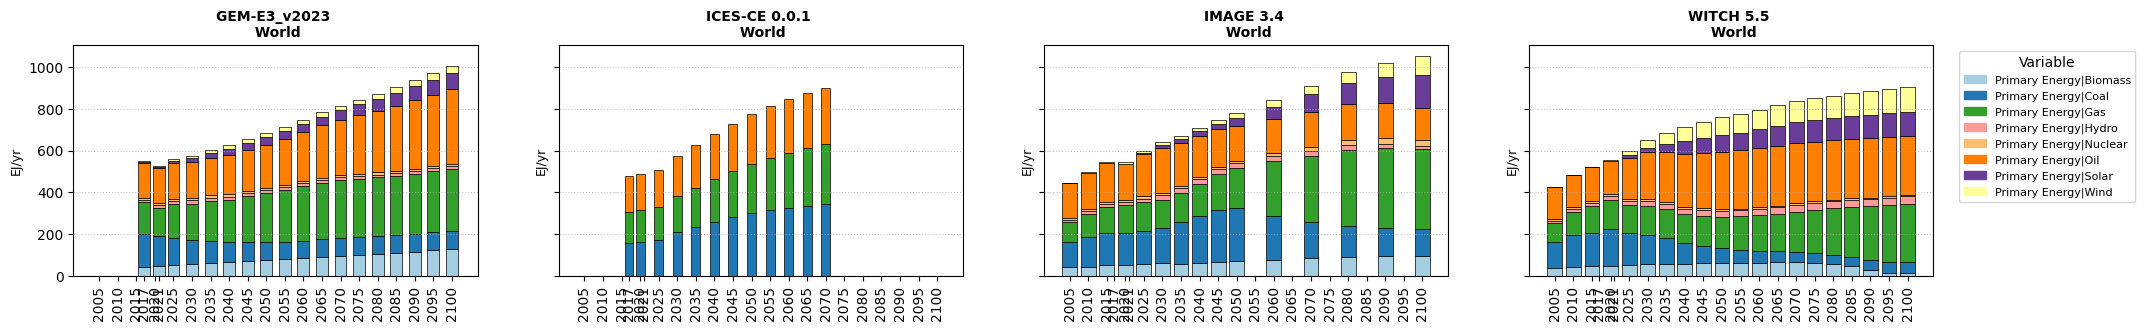

In [ ]:
# filtering data
filtered_data = data[
    (data["variable"].isin(vars)) & (data["region"].isin(regions)) & (data["scenario"].isin(scenario)) & (data["model"].isin(models))
]

filtered_data["year"] = pd.to_numeric(filtered_data["year"])

filtered_models = filtered_data["model"].unique()

if len(filtered_models) == 0:
    print("No models contain the defined variables for the given regions.")
else:
    # grid layout
    num_subplots = len(filtered_models)
    num_columns = num_subplots  
    num_rows = 1

    # get unique values dynamically
    unique_units = filtered_data["unit"].unique()
    ylabel_text = unique_units[0] if len(unique_units) == 1 else ", ".join(unique_units)

# plot stacked bar plots side by side
    fig, axes = plt.subplots(
        nrows=num_rows, ncols=num_columns,
        figsize=(6 * num_columns, 3 * num_rows),
        sharex=True, sharey=True
    )
    
    if num_subplots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    unique_years = sorted(filtered_data["year"].unique())
    variable_colors = {var: plt.cm.Paired(i / len(vars)) for i, var in enumerate(vars)}
    
    all_vars = set()
    
    for i, model in enumerate(filtered_models):
        model_data = filtered_data[filtered_data["model"] == model]
        region = model_data["region"].unique()[0]  
        pivot_data = model_data.pivot_table(index="year", columns="variable", values="value", aggfunc="sum")
        
        x_positions = pivot_data.index.to_numpy()
        width = np.min(np.diff(x_positions)) *.8
        
        bottom = np.zeros(len(x_positions))
        for var in pivot_data.columns:
            axes[i].bar(x_positions, pivot_data[var], width=width, label=var, bottom=bottom, color=variable_colors[var], edgecolor='black', linewidth=0.5)
            bottom += pivot_data[var].to_numpy()
            all_vars.add(var)
        
        axes[i].set_title(f"{model} \n {region}", fontsize=10, fontweight="bold")
        axes[i].set_ylabel(ylabel_text, fontsize=9)
        axes[i].set_xticks(unique_years)
        axes[i].set_xticklabels(unique_years, rotation=90)
        
        axes[i].grid(axis="y", linestyle=":", alpha=0.7)
    
    legend_ax = axes[-1]
    handles, labels = [], []
    for var in sorted(all_vars):
        handles.append(plt.Rectangle((0,0),1,1, color=variable_colors[var]))
        labels.append(var)
    legend_ax.legend(handles, labels, title="Variable", fontsize=8, bbox_to_anchor=(1.05, 1), loc='upper left')
    

    plt.show()

### identifying potential errors in scenario or model names

In [ ]:
print(df['model'].unique())
print(df['scenario'].unique())
print(df['region'].unique())


['IMAGE 3.2' 'JRC-TIMES-EU 1.1.2' 'RECC 2.5' 'RECC 2.6' 'REMIND 3.3'
 'WITCH 5.0' 'WITCH 5.5']
['SSP2' 'SSP2-20C' 'SSP2-CIRC' 'SSP2-CIRC-20C' 'SSP2\xa0' 'SSP2EU_PBS-NPi'
 '2C']
['Africa (R10)' 'Asia (R5)' 'China+ (R10)' 'Europe (R10)'
 'IMAGE 3.2|Brazil' 'IMAGE 3.2|Canada' 'IMAGE 3.2|Central Europe'
 'IMAGE 3.2|China' 'IMAGE 3.2|Eastern Africa' 'IMAGE 3.2|India'
 'IMAGE 3.2|Indonesia' 'IMAGE 3.2|Japan' 'IMAGE 3.2|Kazakhstan region'
 'IMAGE 3.2|Korea' 'IMAGE 3.2|Mexico' 'IMAGE 3.2|Middle East'
 'IMAGE 3.2|Northern Africa' 'IMAGE 3.2|Oceania'
 'IMAGE 3.2|Rest of Central America' 'IMAGE 3.2|Rest of South America'
 'IMAGE 3.2|Rest of South Asia' 'IMAGE 3.2|Rest of Southern Africa'
 'IMAGE 3.2|Russia' 'IMAGE 3.2|South Africa' 'IMAGE 3.2|Southeastern Asia'
 'IMAGE 3.2|Turkey' 'IMAGE 3.2|USA' 'IMAGE 3.2|Ukraine region'
 'IMAGE 3.2|Western Africa' 'IMAGE 3.2|Western Europe' 'India+ (R10)'
 'Latin America (R10)' 'Latin America (R5)' 'Middle East & Africa (R5)'
 'Middle East (R10)' 'North Americ